In [1]:
import MDAnalysis as mda
from MDAnalysis.analysis.rms import RMSD
from prody import *
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import *
import seaborn as sns
import pandas as pd

# get point data

In [23]:
def calcDistancesloop2_Bsheet(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 262 and name CA')
        ca2 = structure.select('resid 408 and name CA')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop2_lid(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 405 and name CA')
        ca2 = structure.select('resid 221 and name CA')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop2_loop3(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 408 and name CA')
        ca2 = structure.select('resid 341 and name CA')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop1_helix2(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 408 and name CA')
        ca2 = structure.select('resid 185 and name CA')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

def calcDistancesloop1_loop2(numbers, currDirectory):
    distances_A = []
    distances_B = []
    for currNumber in numbers:
        structure = parsePDB(currDirectory + 'frame_' + currNumber + '.pdb')
        # Select the alpha carbon atoms of the specified residues
        ca1 = structure.select('resid 191 and name OG')
        ca2 = structure.select('resid 419 and name CE')

        # Ensure the selections are not empty
        distance_A = calcDistance(ca1[0], ca2[0])
        distance_B = calcDistance(ca1[1], ca2[1])
        distances_A.append(distance_A)
        distances_B.append(distance_B)
    return distances_A, distances_B

In [ ]:
# all distances
# mutations = ['G188Q', 'L155W', 'V135A', 'WT']
mutations = ['WT', 'N272H', 'G188Q', 'L155W', 'V135A'] # ['WT', 'WT_AF']
Runs = ['Run1', 'Run2', 'Run3', 'Run4', 'Run5']

frames = ["{:04}".format(i) for i in range(1, 1001)]

# mutations = ['N272H']
allDistance = {}
for currMutation in mutations:

    print ('Evaluate ' + currMutation)
    if currMutation not in allDistance:
        allDistance[currMutation] = {}
    
        
    for currRuns in Runs:
        currRun = currRuns + '_frame'
        if currRuns not in allDistance[currMutation].keys():
            allDistance[currMutation][currRuns] = {}

        if currMutation == 'N272H_2':
            currDirectory = '../CPOX_MD/' + currMutation + '/' + currRun + '/'

            dist_262_408_1, dist_262_408_2 = calcDistancesloop2_Bsheet(frames, currDirectory)
            dist_221_405_1, dist_221_405_2 = calcDistancesloop2_lid(frames, currDirectory)
            dist_341_408_1, dist_341_408_2 = calcDistancesloop2_loop3(frames, currDirectory)
            dist_73_305_1, dist_73_305_2 = calcDistancesloop1_helix2(frames, currDirectory)
            dist_83_311_1, dist_83_311_2 = calcDistancesloop1_loop2(frames, currDirectory)

            currDirectory = '../CPOX_MD_N272H/' + currMutation + '/' + currRun + '/'

            dist_262_408_1_sup, dist_262_408_2_sup = calcDistancesloop2_Bsheet(frames, currDirectory)
            dist_221_405_1_sup, dist_221_405_2_sup = calcDistancesloop2_lid(frames, currDirectory)
            dist_341_408_1_sup, dist_341_408_2_sup = calcDistancesloop2_loop3(frames, currDirectory)
            dist_73_305_1_sup, dist_73_305_2_sup = calcDistancesloop1_helix2(frames, currDirectory)
            dist_83_311_1_sup, dist_83_311_2_sup = calcDistancesloop1_loop2(frames, currDirectory)

            dist_262_408_1 += dist_262_408_1_sup
            dist_262_408_2 += dist_262_408_2_sup
            dist_221_405_1 += dist_221_405_1_sup
            dist_221_405_2 += dist_221_405_2_sup
            dist_341_408_1 += dist_341_408_1_sup
            dist_341_408_2 += dist_341_408_2_sup
            dist_73_305_1 += dist_73_305_1_sup
            dist_73_305_2 += dist_73_305_2_sup
            dist_83_311_1 += dist_83_311_1_sup
            dist_83_311_2 += dist_83_311_2_sup

            allDistance[currMutation][currRuns]['262_408'] = {'1': dist_262_408_1, '2':dist_262_408_2}
            allDistance[currMutation][currRuns]['221_405'] = {'1': dist_221_405_1, '2':dist_221_405_2}
            allDistance[currMutation][currRuns]['341_408'] = {'1': dist_341_408_1, '2':dist_341_408_2}
            allDistance[currMutation][currRuns]['73_305'] = {'1': dist_73_305_1, '2':dist_73_305_2}
            allDistance[currMutation][currRuns]['83_311'] = {'1': dist_83_311_1, '2':dist_83_311_2}
            
        else:
            currDirectory = '../CPOX_MD/' + currMutation + '/' + currRun + '/'

            dist_262_408_1, dist_262_408_2 = calcDistancesloop2_Bsheet(frames, currDirectory)
            dist_221_405_1, dist_221_405_2 = calcDistancesloop2_lid(frames, currDirectory)
            dist_341_408_1, dist_341_408_2 = calcDistancesloop2_loop3(frames, currDirectory)
            dist_73_305_1, dist_73_305_2 = calcDistancesloop1_helix2(frames, currDirectory)
            dist_83_311_1, dist_83_311_2 = calcDistancesloop1_loop2(frames, currDirectory)

            allDistance[currMutation][currRuns]['262_408'] = {'1': dist_262_408_1, '2':dist_262_408_2}
            allDistance[currMutation][currRuns]['221_405'] = {'1': dist_221_405_1, '2':dist_221_405_2}
            allDistance[currMutation][currRuns]['341_408'] = {'1': dist_341_408_1, '2':dist_341_408_2}
            allDistance[currMutation][currRuns]['73_305'] = {'1': dist_73_305_1, '2':dist_73_305_2}
            allDistance[currMutation][currRuns]['83_311'] = {'1': dist_83_311_1, '2':dist_83_311_2}
            

@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.


Evaluate WT


@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coordinate set(s) were parsed in 0.15s.
@> 10648 atoms and 1 coo

In [31]:
allDistance.keys()

dict_keys(['WT', 'N272H', 'G188Q', 'L155W', 'V135A'])

In [32]:
data = allDistance

# Prepare DataFrame columns and data
columns = []
data_lists = []

# Process data
for mutation in data:
    for run in data[mutation]:
        for dist_key, chains in data[mutation][run].items():
            for chain_id, values in chains.items():
                col_name = f"{mutation}_{run}_{dist_key}_{chain_id}"
                columns.append(col_name)
                data_lists.append(values)  # Append the whole list, not extend

# Create DataFrame from the lists
df = pd.DataFrame(list(zip(*data_lists)), columns=columns)

# Write to Excel file
df.to_excel("Crystal_distances_all.xlsx", engine='openpyxl', index=False)

In [33]:
def parse_features(file_path):
    features = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            if parts[0] != 'frame':
                frame_pocket = (int(parts[0].split('_')[1]), parts[1].strip())  # Tuple of (frame, pocket)
                # Extracting features as a dict
                feature_values = dict(part.split(': ') for part in parts[2:])
                features[frame_pocket] = feature_values
    return features

# Parse the file containing the pockets of interest
def parse_pockets_of_interest(file_path):
    pockets_of_interest = {}
    countList = {}
    with open(file_path, 'r') as file:
        for line in file:
            parts = line.strip().split('\t')
            frame = parts[0]
            pocket = parts[1]
            ratio = parts[2].split(',')
            if frame != 'frame':
                pockets_of_interest[int(frame.split('_')[1])] = pocket
                countList[int(frame.split('_')[1])] = [float(x) for x in ratio]
    return pockets_of_interest, countList

def FeatureDistribution(features, pockets_of_interest):
    frames = sorted(pockets_of_interest.keys(), key=lambda x: int(x))
    volumes = [float(features[(frame, pockets_of_interest[frame])]['Volume']) \
                      for frame in frames]
    
    return volumes



In [36]:
chain1_cutoff_count = {}
chain2_cutoff_count = {}
cutoffs = 1
pocket_pick = {}

for currMutation in mutations:
    if currMutation not in chain1_cutoff_count:
        chain1_cutoff_count[currMutation] = {}
    if currMutation not in chain2_cutoff_count:
        chain2_cutoff_count[currMutation] = {}
        
    if currMutation not in pocket_pick:
        pocket_pick[currMutation] = {}
    
        
    for run in Runs:
        if run not in chain1_cutoff_count[currMutation]:
            chain1_cutoff_count[currMutation][run] = {}
        if run not in chain2_cutoff_count[currMutation]:
            chain2_cutoff_count[currMutation][run] = {}
            
        if run not in pocket_pick[currMutation]:
            pocket_pick[currMutation][run] = {}   
        
        if currMutation == 'N272H_2':    
            features_file = '../CPOX_MD/' + currMutation + '/' + run + '_Features.txt'
            features = parse_features(features_file)
            pockets_of_interest_file = '../CPOX_MD/' + currMutation + '/fpocketResults/' + run + '_chain2.txt'
            pockets_of_interest, cutoff_count = parse_pockets_of_interest(pockets_of_interest_file)
            volumes = FeatureDistribution(features, pockets_of_interest)
            chain1_cutoff_count[currMutation][run] = volumes[:1000]
            
            pockets_of_interest_file = '../CPOX_MD/' + currMutation + '/fpocketResults/' + run + '_chain2.txt'
            pockets_of_interest, cutoff_count = parse_pockets_of_interest(pockets_of_interest_file)
            volumes2 = FeatureDistribution(features, pockets_of_interest)
            chain2_cutoff_count[currMutation][run] = volumes2[:1000]
            # print (len(volumes))
            
            features_file = '../CPOX_MD_N272H/' + currMutation + '/' + run + '_Features.txt'
            pockets_of_interest_file = '../CPOX_MD_N272H/' + currMutation + '/fpocketResults/' + run + '_chain2.txt'
            features2 = parse_features(features_file)
            pockets_of_interest, cutoff_count = parse_pockets_of_interest(pockets_of_interest_file)
            volumes_1 = FeatureDistribution(features2, pockets_of_interest)
            chain1_cutoff_count[currMutation][run] += volumes_1[:1000]
            
            # print (features)
            pockets_of_interest_file_2 = '../CPOX_MD_N272H/' + currMutation + '/fpocketResults/' + run + '_chain1.txt'
            features2 = parse_features(features_file)
            pockets_of_interest_2, cutoff_count_2 = parse_pockets_of_interest(pockets_of_interest_file_2)
            volumes2_2 = FeatureDistribution(features2, pockets_of_interest_2)

            # print ()
            chain2_cutoff_count[currMutation][run] += volumes2_2[:1000]
        
        else:   
            features_file = '../CPOX_MD/' + currMutation + '/' + run + '_Features.txt'
            features = parse_features(features_file)
            pockets_of_interest_file = '../CPOX_MD/' + currMutation + '/fpocketResults/' + run + '_chain2.txt'
            pockets_of_interest, cutoff_count = parse_pockets_of_interest(pockets_of_interest_file)
            volumes = FeatureDistribution(features, pockets_of_interest)
            chain1_cutoff_count[currMutation][run] = volumes[:1000]
            
            # print (features)
            pockets_of_interest_file_2 = '../CPOX_MD/' + currMutation + '/fpocketResults/' + run + '_chain1.txt'
            pockets_of_interest_2, cutoff_count_2 = parse_pockets_of_interest(pockets_of_interest_file_2)
            volumes2 = FeatureDistribution(features, pockets_of_interest_2)
            
            chain2_cutoff_count[currMutation][run] = volumes2[:1000]

In [38]:
for currMutation in mutations:
    for run in Runs:
        if len(chain1_cutoff_count[currMutation][run]) != 1000:
            print (currMutation, run)
            

# PCA

In [8]:
fileNames = []
mutations = ['WT', 'N272H', 'G188Q', 'L155W', 'V135A']
for mutate in mutations:
    for run in Runs:
        for frame in [str(i).zfill(4) for i in range(1, 1001)]:
            if mutate == 'N272H':
                fileNames.append('../CPOX_MD/' + mutate + '/' + run + '_frame/frame_' + frame + '.pdb')
                # fileNames.append('../CPOX_MD_N272H/' + mutate + '/' + run + '_frame/frame_' + frame + '.pdb')
            else:
                fileNames.append('../CPOX_MD/' + mutate + '/' + run + '_frame/frame_' + frame + '.pdb')

print (len(fileNames))

25000


In [9]:
fileNames[-3:]# metrics

['../CPOX_MD/V135A/Run5_frame/frame_0998.pdb',
 '../CPOX_MD/V135A/Run5_frame/frame_0999.pdb',
 '../CPOX_MD/V135A/Run5_frame/frame_1000.pdb']

In [10]:
reference_structure = parsePDB('../CPOX_MD/WT/Run1/step3_input.pdb', subset='ca').select("resnum 122 to 447")
reference_structure

@> 672 atoms and 1 coordinate set(s) were parsed in 0.13s.


<Selection: 'resnum 122 to 447' from step3_input_ca (652 atoms)>

In [11]:
pdbs_all = parsePDB(fileNames, subset='ca')
# reference_structure = parsePDB('../CPOX_MD/WT/Run1/step3_input.pdb', subset='ca').select("res")
pdbs_all.insert(0, reference_structure)

# pdbs_all_filter = [item.select("resnum 122 to 447") for item in pdbs_all[:3001]]
# pdbs_all_filter += [item.select("resnum 14 to 339") for item in pdbs_all[3001:]]

len(pdbs_all)

@> 25000 PDBs were parsed in 678.93s.                                  


25001

In [12]:
    
ensemble_all = buildPDBEnsemble(pdbs_all, ref=reference_structure)
pca = PCA('allAligned')           # Instantiate a PCA instance
pca.buildCovariance(ensemble_all)   # Build covariance for the ensemble
pca.calcModes()                 # Calculate modes (20 of the by default)
    

@> Starting iterative superposition:                     
@> Step #1: RMSD difference = 1.1931e+00
@> Step #2: RMSD difference = 2.0345e-04
@> Step #3: RMSD difference = 1.5275e-07
@> Iterative superposition completed in 21.90s.
@> Final superposition to calculate transformations.
@> Superposition completed in 7.16 seconds.
@> Ensemble (25001 conformations) were built in 5793.43s.
@> Covariance is calculated using 25001 coordinate sets.
@> Covariance matrix calculated in 2.366092s.
@> 20 modes were calculated in 0.36s.


In [16]:
allResults = calcProjection(ensemble_all, pca[:3])

In [17]:
# rmsd = ensemble_all.getRMSDs()

In [18]:
# Create the plot
# plt.figure(figsize=(16, 12))
# plt.plot(rmsd)
# plt.savefig('RMSD.png', dpi=500)

In [39]:
data = allResults
len(data)

25001

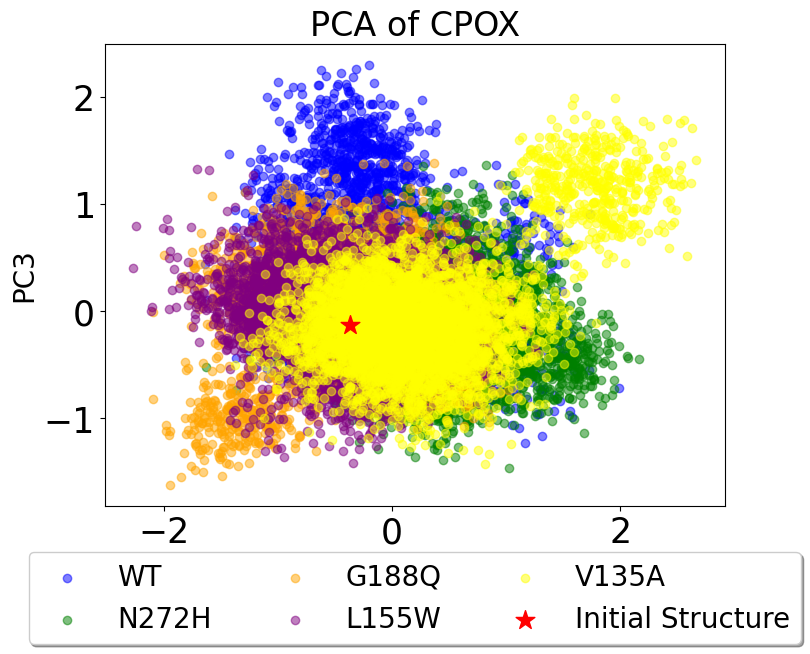

In [111]:
# Define labels and colors:
colors = ['blue', 'green', 'orange', 'purple', 'yellow']  # Colors for WT, G188Q, L155W, V135A
labels = ['WT', 'N272H', 'G188Q', 'L155W', 'V135A']

# Create the plot
plt.figure(figsize=(8, 6))
# Increase font sizes
plt.rc('xtick', labelsize=25)
plt.rc('ytick', labelsize=25)
plt.rcParams.update({'font.size': 20})



# Plot each of the 5000 points for the 4 labels
for i, color in enumerate(colors):
    if color == 'green2':
        start = 1 + i * 5000
        end = 1 + (i + 1) * 5000
        # plt.scatter(data[start:end, 0], data[start:end, 1], color=color, alpha=0.5, label=labels[i])
        plt.scatter(data[start:end, 0], data[start:end, 1], color=color, alpha=0.5, label=labels[i])
    else:
        start = 1 + i * 5000
        end = 1 + (i + 1) * 5000
        # plt.scatter(data[start:end, 0], data[start:end, 1], color=color, alpha=0.5, label=labels[i])
        plt.scatter(data[start:end, 1], data[start:end, 2], color=color, alpha=0.5, label=labels[i])

# Plot the initial structure with a red star
plt.scatter(data[0, 0], data[0, 1], color='red', marker='*', s=200, label='Initial Structure')
    
# Setting the plot title and labels
plt.title('PCA of CPOX')
plt.xlabel('PC2')
plt.ylabel('PC3')

# Adding a legend
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.07), shadow=True, ncol=3)
# Show the plot
plt.savefig('Crystal_PCA_23.png', dpi=800, bbox_inches='tight')
plt.show()

In [44]:
labels

['WT', 'N272H', 'G188Q', 'L155W', 'V135A']

In [45]:
!xdg-open .

In [120]:
i = 4
start = 1 + i * 5000
end = 1 + (i + 1) * 5000

# ['WT', 'G188Q', 'L155W', 'V135A']
WT_data_x = data[start:end, 1]#, data[start:end, 1]# Create the plot
WT_data_y = data[start:end, 2]

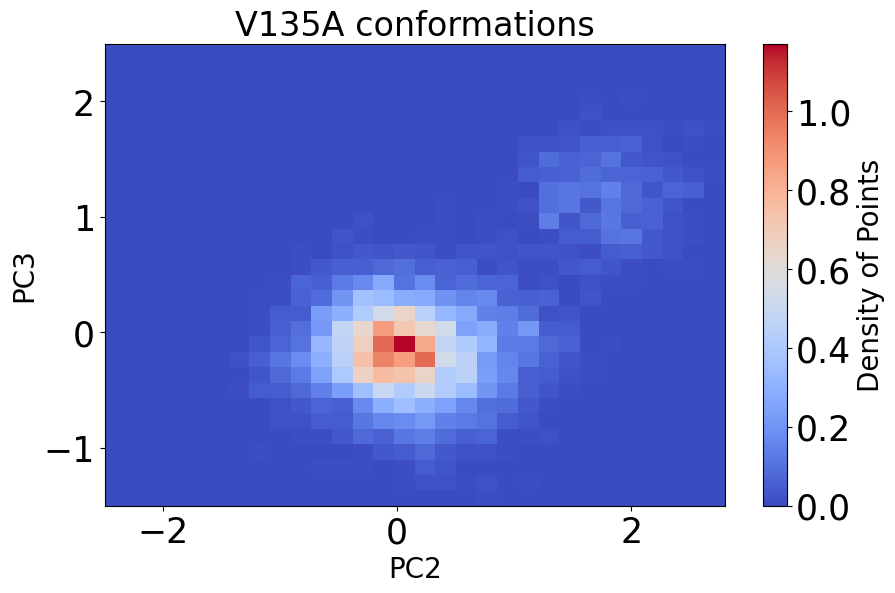

In [121]:

# Define the number of bins
bins = [30, 30]  # You can adjust this for different resolutions

# Define the x and y ranges explicitly for the histogram
x_range = [-2.5, 2.8]
y_range = [-1.5, 2.5]

# Create the 2D histogram plot
plt.figure(figsize=(10, 6))


h, xedges, yedges, image = plt.hist2d(WT_data_x, WT_data_y, bins=bins, range=[x_range, y_range], cmap='coolwarm', density=True)

# Add a colorbar to show the color scale
plt.colorbar(label='Density of Points')

# Adding labels and title
plt.title(labels[i] + ' conformations')
plt.xlabel('PC2')
plt.ylabel('PC3')

# Set x and y ranges
# plt.xlim(-3.5, 2.3)
# plt.ylim(-2.5, 2.5)

# Set x and y ranges using xlim and ylim for good measure
plt.xlim(x_range)
plt.ylim(y_range)

# Show plot
plt.savefig(labels[i] + '_density_23.png', dpi=600)
plt.show()

# PCA vs key metrics

In [63]:
data.shape

(25001, 3)

In [80]:
# N272H_data_x = data[6000:, 0]#, data[start:end, 1]# Create the plot
# N272H_data_y = data[6000:, 2]

WT_data_x = data # [:6000, 0]#, data[start:end, 1]# Create the plot
WT_data_y = data # [:6000, 2]

print (len(WT_data_x), len(WT_data_y))
# print (len(N272H_data_x), len(N272H_data_y))



3001 3001


In [157]:
# get necessary data
# currDistance = '232_293' # 134_294, 134_297, 232_293
chain = '2'

currDist_221_405 = []
currDist_341_408 = []
currDist_73_305 = []
currDist_83_311 = []
currVol = []
for currMutation in mutations:
    for run in Runs:
        currDist_221_405 += allDistance[currMutation][currRuns]['221_405'][chain]
        currDist_73_305 += allDistance[currMutation][currRuns]['73_305'][chain]
        currDist_341_408 += allDistance[currMutation][currRuns]['341_408'][chain]
        currDist_83_311 += allDistance[currMutation][currRuns]['83_311'][chain]
        if chain == '1':
            currVol += chain1_cutoff_count[currMutation][run]
        else:
            currVol += chain2_cutoff_count[currMutation][run]


# Modes vs metrics

In [223]:
!xdg-open .

In [224]:
len(allResults)

4001

In [225]:
# currDist_134_294, currDist_134_113, currDist_232_293, currDist_73_305, currVol

In [180]:
xlabels = 'PC1'
x_data = data[1:, 0] # PCx

ylabels = 'Volumes'
y_data = currVol

ylabels = 'Loop1-loop2'
y_data = currDist_83_311 # 221_405, 341_408, 73_305, 83_311


if chain == '1':
    currChainPlot = 'A'
else:
    currChainPlot = 'B'

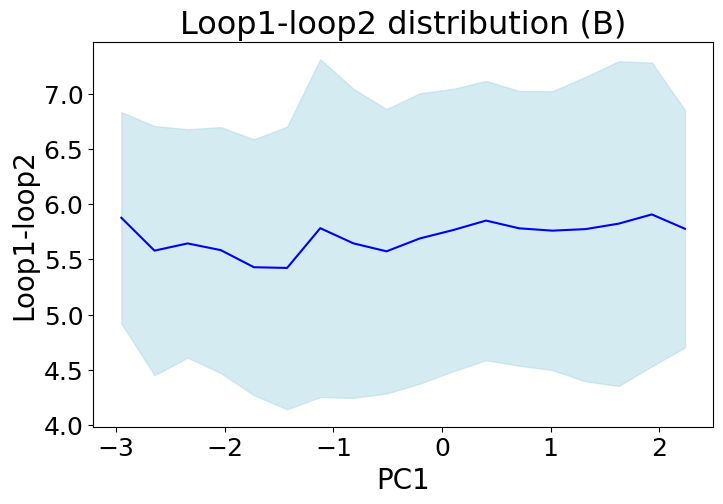

In [181]:
import numpy as np

plt.figure(figsize=(8, 5))
# Increase font sizes
plt.rc('xtick', labelsize=18)
plt.rc('ytick', labelsize=18)
plt.rcParams.update({'font.size': 20})

x_data = np.array(x_data)
y_data = np.array(y_data)

# Calculate the bin edges and digitize x_data to determine bin membership
bin_edges = np.linspace(min(x_data), max(x_data), 20)  # Still use 20 bins, adjust as needed
digitized = np.digitize(x_data, bin_edges)

# Calculate the average y_data for each bin and standard deviation
bin_means = [y_data[digitized == i].mean() if np.sum(digitized == i) > 0 else np.nan for i in range(1, len(bin_edges))]
bin_std = [y_data[digitized == i].std() if np.sum(digitized == i) > 0 else np.nan for i in range(1, len(bin_edges))]

# Define the bin centers (still float values)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])

# Plot the average y_data for each bin (using float data)
plt.plot(bin_centers, bin_means, label='Average Y', color='blue')

# Fill the area around the line with the standard deviation (shaded area)
plt.fill_between(bin_centers, np.array(bin_means) - np.array(bin_std), np.array(bin_means) + np.array(bin_std), color='lightblue', alpha=0.5)

# Set the x-axis and y-axis labels
plt.xlabel(xlabels, fontsize=20)
plt.ylabel(ylabels, fontsize=20)

# Add a title
plt.title(ylabels + ' distribution (' + currChainPlot + ')', fontsize=23)

# Show the plot
plt.savefig(xlabels + '_' + ylabels + '_' + currChainPlot + '.png', dpi=800, bbox_inches='tight')
plt.show()

In [184]:
len(x_data[])

4001

In [256]:
!xdg-open .